In [1]:
#task
''''Our top priority in this business problem is to identify 
customers who are getting churned. Even if we predict non-churning 
customers as churned, it won't harm our business. But predicting churning 
customers as Non-churning will do. So recall (TP/TP+FN) need to be higher.

Till now, I have managed to get a recall of 62%. Need better.'''

"'Our top priority in this business problem is to identify \ncustomers who are getting churned. Even if we predict non-churning \ncustomers as churned, it won't harm our business. But predicting churning \ncustomers as Non-churning will do. So recall (TP/TP+FN) need to be higher.\n\nTill now, I have managed to get a recall of 62%. Need better."

In [2]:
#output
# -- % de clientes que são cancelados
# -- metrica recall > 62%

In [3]:
#APPROACH STRATEGY
    #DESCRIPTION DATA ANALYSIS
         # -- load data
         # -- check statistics of the numeric features
         # -- check nan values
         # -- check zeroed values
         # -- check for copied rows 
         #target definition - Attrition_Flag
    #DATA VISUALIZATION
        #hypothesis creation|correlationship between labels and target
        #hypothesis validation
        
    #DATA PREPARATION
        #select the bests classes|encoder|normalization in a few features
        #aplly normalization in some variables
        #balanced dataset
    
    #ML
        #models_test|best_model|best parameters to that model
        
    #METRICS
        #accuracy_score
        #classification_report

In [1]:
#IMPUT
import pandas as pd
import numpy as np

#GRAPHICS
import seaborn as sns
import matplotlib.pyplot as plt

#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

#ml models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


#unbalanced dataset
from imblearn.over_sampling import RandomOverSampler

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#LOAD DATA
path = 'BankChurners.csv'
data = pd.read_csv(path)
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
#DESCRIPTION DATA ANALYSIS -- data tyep|n_columns|n_rows ##################################################
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
#nan values -- no nan values
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
#check statistics of the numeric features
#looking for zeroed values -- no zeroed values
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [72]:
#possible variables for normalization or standarlization
d_p = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Customer_Age','Months_on_book','Total_Trans_Ct']

In [9]:
#check for copied rows in the ID of the client -- no copied rows 
data.duplicated(subset='CLIENTNUM').any()

False

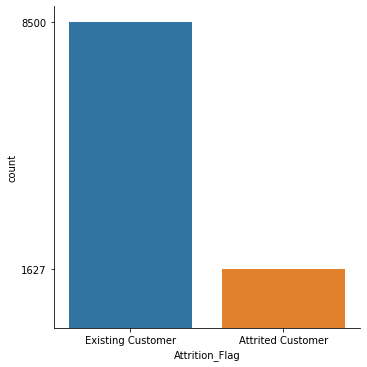

In [13]:
#checking the balance of the target -- totally unbalanced
sns.catplot(x='Attrition_Flag',kind='count',data=data)
plt.yticks(data.Attrition_Flag.value_counts())
plt.show()

In [22]:
#list of numeric features/categoric features
numer = [f for f in list(data.columns) if data[f].dtype!=object]
categ = [f for f in list(data.columns) if data[f].dtype==object]

numeric_features = data[numer]
categoric_features = data[categ]

In [138]:
#DATA VISUALIZATION #######################################################################################

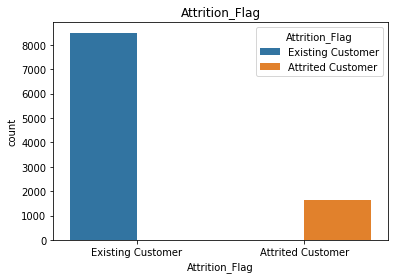

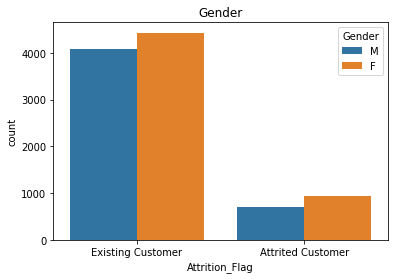

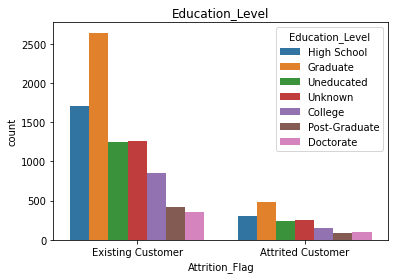

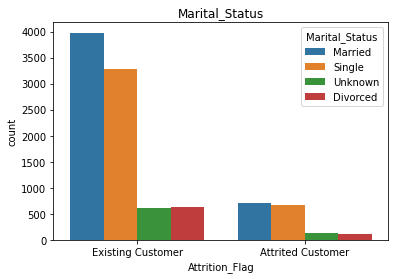

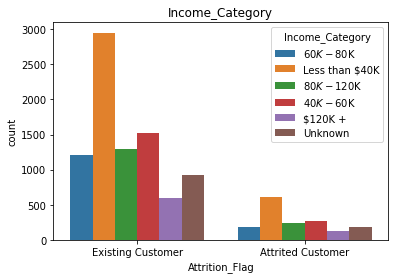

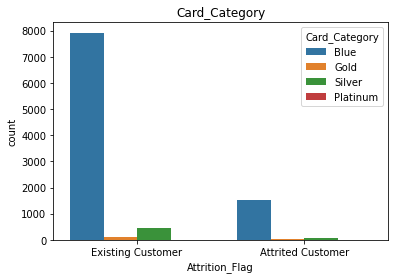

In [25]:
#check the correlationship between categorics variables and the target 
plt.figure()
for graphc in categoric_features.columns:
    sns.countplot(x='Attrition_Flag' , hue=graphc , data=categoric_features)
    plt.title(graphc)
    plt.show()

#check the correlationship between numeric variables and the target 
plt.figure()
for graphc in numeric_features.columns:
    sns.boxplot(x='Attrition_Flag' , y=graphc , data = data)
    plt.title(graphc)
    plt.show()

In [36]:
#variables in which the rate of existing customers is less than the rate of Attracted Customer
#total_revolvig_bal
#contacts_count_12_mon
#Total_relashionship_count

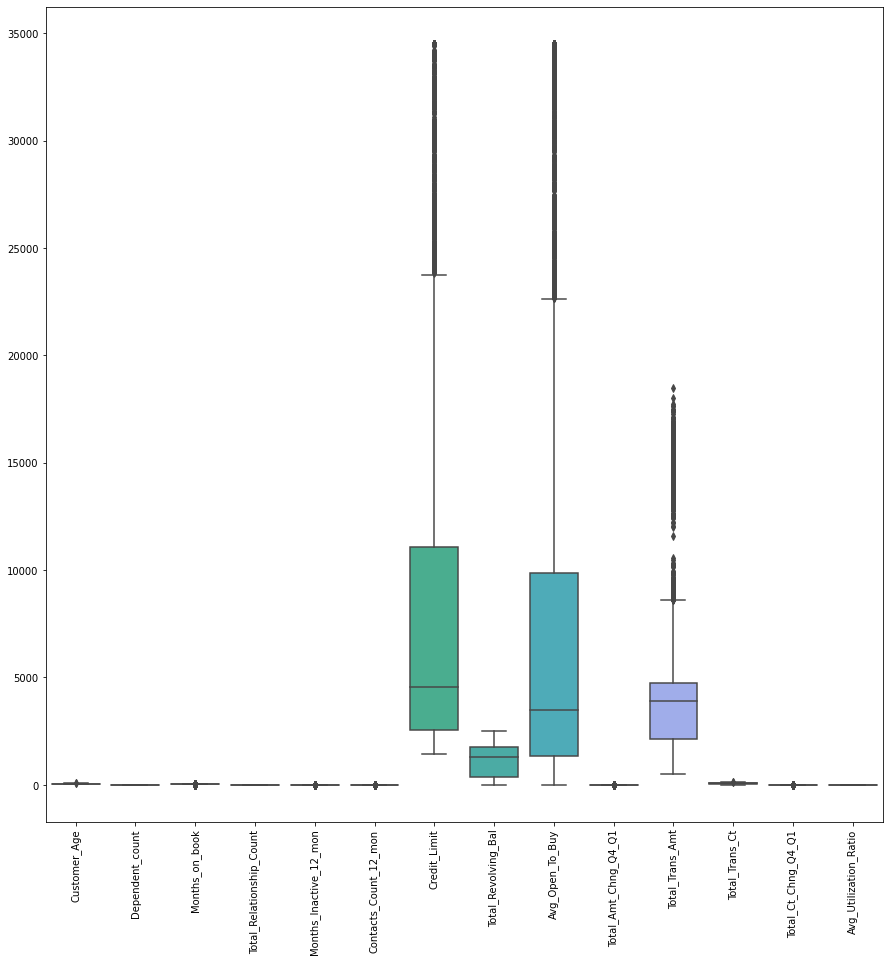

In [48]:
#checking the scale of numerical variables
plt.figure(figsize=(15,15))
sns.boxplot(data=numeric_features.drop('CLIENTNUM',axis=1))
plt.xticks(rotation=90)
plt.show()

In [118]:
#DATA PREPARATION #########################################################################################


In [127]:
#NORMALIZATION

#copy dataset
numeric_dataset = data.copy()
#put just the numeric features to preprocessor
numeric_dataset = numeric_dataset[numeric_features.columns]

#drop the clientnum because it will hinder the prediction
numeric_dataset.drop('CLIENTNUM',axis=1,inplace=True)

In [128]:
#normalization the features
preprocessor = MinMaxScaler().fit(numeric_dataset)

In [129]:
#applying preprocessing to the numeric features in the dataset
data[numeric_dataset.columns] = preprocessor.transform(data[numeric_dataset.columns])

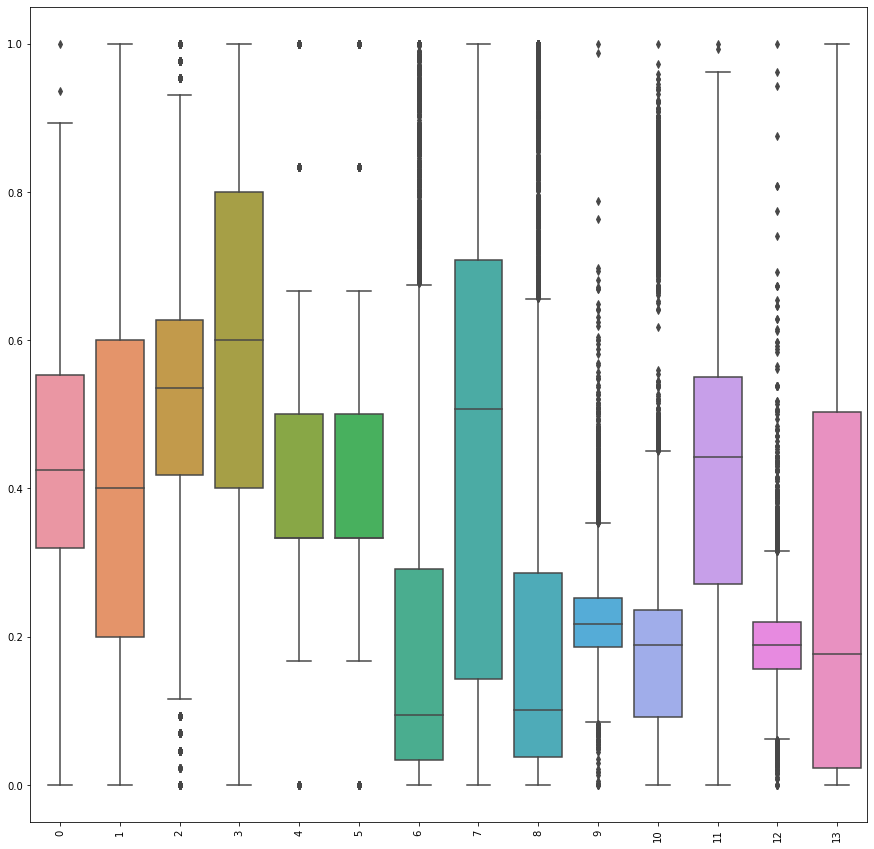

In [123]:
#checking the scale of the new numerical variables
plt.figure(figsize=(15,15))
sns.boxplot(data=preprocessor_dataset)
plt.xticks(rotation=90)
plt.show()

In [131]:
#ENCODE -- encode the categorical features

#drop the clientnum because it will hinder the prediction
data.drop('CLIENTNUM',axis=1,inplace=True)

In [137]:
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,...,0,0,1,0,0,0,1,0,0,0
1,Existing Customer,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,...,0,0,0,0,1,0,1,0,0,0
2,Existing Customer,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,...,0,0,0,1,0,0,1,0,0,0
3,Existing Customer,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,...,0,0,0,0,1,0,1,0,0,0
4,Existing Customer,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,...,0,0,1,0,0,0,1,0,0,0


In [136]:
data.shape

(10127, 38)

In [135]:
#using get_dummies to the encoder
data = pd.get_dummies(data,columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])

In [147]:
#split the dataset
x = data.drop('Attrition_Flag',axis=1)
y = data.Attrition_Flag

In [148]:
#dealing with the unbalanced dataset
unbalanced = RandomOverSampler()
x_res , y_res = unbalanced.fit_resample(x,y)

In [160]:
#dataset of test to the model
test_data = data.copy()

In [161]:
validator = test_data.Attrition_Flag
test_data = test_data.drop('Attrition_Flag',axis=1)

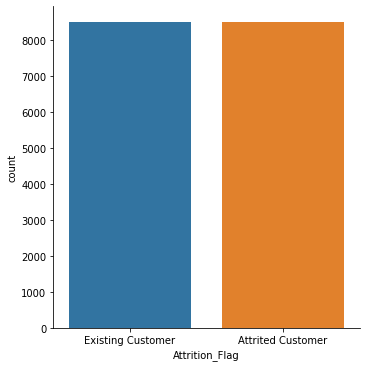

In [151]:
#checking the balance of the target -- totally balanced
sns.catplot(x=y_res,kind='count',data=data)

In [139]:
#ML MODELS #####################################################################################

In [185]:
#identifying the best model
GradientBoostingClassifier_model = GradientBoostingClassifier().fit(x_res,y_res)
KNeighborsClassifier_model = KNeighborsClassifier().fit(x_res,y_res)
RandomForestClassifier_model = RandomForestClassifier().fit(x_res,y_res)

#accuracy score
print('score_GradientBoostingClassifier_model',accuracy_score(validator,GradientBoostingClassifier_model.predict(test_data)))
print('score_KNeighborsClassifier_model',accuracy_score(validator,KNeighborsClassifier_model.predict(test_data)))
print('score_RandomForestClassifier_model',accuracy_score(validator,RandomForestClassifier_model.predict(test_data)))

score_GradientBoostingClassifier_model 0.9606991211612521
score_KNeighborsClassifier_model 0.8603732596030413
score_RandomForestClassifier_model 1.0


In [187]:
#classification_report
print('GradientBoostingClassifier_model')
print(classification_report(validator,GradientBoostingClassifier_model.predict(test_data)))
print('')

print('KNeighborsClassifier_model')
print(classification_report(validator,KNeighborsClassifier_model.predict(test_data)))
print('')

print('RandomForestClassifier_model')
print(classification_report(validator,RandomForestClassifier_model.predict(test_data)))

GradientBoostingClassifier_model
                   precision    recall  f1-score   support

Attrited Customer       0.82      0.98      0.89      1627
Existing Customer       1.00      0.96      0.98      8500

         accuracy                           0.96     10127
        macro avg       0.91      0.97      0.93     10127
     weighted avg       0.97      0.96      0.96     10127


KNeighborsClassifier_model
                   precision    recall  f1-score   support

Attrited Customer       0.54      0.97      0.69      1627
Existing Customer       0.99      0.84      0.91      8500

         accuracy                           0.86     10127
        macro avg       0.77      0.91      0.80     10127
     weighted avg       0.92      0.86      0.87     10127


RandomForestClassifier_model
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      1627
Existing Customer       1.00      1.00      1.00      8500

         accurac

In [204]:
#RandomForestClassifier_model is the best model

#using cross-validation technique for confirmation
df_test = pd.read_csv(path)

In [205]:
#drop CLIENTNUM
df_test.drop('CLIENTNUM',axis=1,inplace=True)
df_test.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)


#normalization
df_test[numeric_dataset.columns] = preprocessor.transform(df_test[numeric_dataset.columns])

#ENCODE
df_test = pd.get_dummies(df_test,columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])


In [206]:
#all dataset without the Attrition_Flag 
x_all = df_test.drop('Attrition_Flag',axis=1)

#all dataset just with Attrition_Flag
y_all = df_test.Attrition_Flag

In [210]:
#cross-validation
score = cross_val_score(RandomForestClassifier_model,x_all,y_all,cv=5)

In [214]:
#score of the cross validation
print(np.mean(score))

0.9238674027762543


In [217]:
#using hyperparameters to select the best parameters for the model

#parameters definition
parameters = {'n_estimators':[100,200,300],
             'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2']}


clf = GridSearchCV(RandomForestClassifier_model , parameters , cv=5, return_train_score=False)
clf.fit(x_all,y_all)
print('melhor score: ',clf.best_score_)
print('melhores parametros: ',clf.best_params_)

melhor score:  0.9273228766772696
melhores parametros:  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
#best model -- RandomForestClassifier
#best parameters -- {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
#model score = 0.9273228766772696

##variables in which the rate of existing customers is less than the rate of Attracted Customer
#--total_revolvig_bal
#--contacts_count_12_mon
#--Total_relashionship_count